--- 
Project for the course in Microeconometrics | Summer 2020, M.Sc. Economics, Bonn University | [Federico Alexander Rizzuto](https://github.com/FedericoAlexanderRizzuto)

# Replication of Joshua D. Angrist, Erich Battistin, and Daniela Vuri  (2017) <a class="tocSkip">   
---

This notebook contains my replication of the results from the following paper:

> Angrist, J. D., Battistin, E., and Vuri, D. (2017). In a small moment: Class size and moral hazard in the Italian Mezzogiorno. _American Economic Journal: Applied Economics, 9(4)_, 216-49.

The original paper, data and code can be accessed [here](https://www.aeaweb.org/articles?id=10.1257/app.20160267).

##### Information about replication and individual contributions:

* All figures and tables, except for Table 7 and Table 9, have been replicated and are numbered as they appear in Angrist et al. (2017).
* Table 4 has been replicated only in part.
* Figures 4 to 6 have been modified and extended as detailed below.
* Figures that constitute an original contribution and extension to the original paper are numbered using the prefix **E**.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Introduction" data-toc-modified-id="1.-Introduction-1">1. Introduction</a></span></li><li><span><a href="#2.-Theoretical-Background" data-toc-modified-id="2.-Theoretical-Background-2">2. Theoretical Background</a></span></li><li><span><a href="#3.-Identification" data-toc-modified-id="3.-Identification-3">3. Identification</a></span></li><li><span><a href="#4.-Empirical-Strategy" data-toc-modified-id="4.-Empirical-Strategy-4">4. Empirical Strategy</a></span></li><li><span><a href="#5.-Replication-of-Lindo-et-al.-(2010)" data-toc-modified-id="5.-Replication-of-Lindo-et-al.-(2010)-5">5. Replication of Lindo et al. (2010)</a></span><ul class="toc-item"><li><span><a href="#5.1.-Data-&amp;-Descriptive-Statistics" data-toc-modified-id="5.1.-Data-&amp;-Descriptive-Statistics-5.1">5.1. Data &amp; Descriptive Statistics</a></span></li><li><span><a href="#5.2.-Results" data-toc-modified-id="5.2.-Results-5.2">5.2. Results</a></span><ul class="toc-item"><li><span><a href="#5.2.1.-Tests-of-the-Validity-of-the-RD-Approach" data-toc-modified-id="5.2.1.-Tests-of-the-Validity-of-the-RD-Approach-5.2.1">5.2.1. Tests of the Validity of the RD Approach</a></span></li><li><span><a href="#i.--Extension:-Visual-Validity-Check" data-toc-modified-id="i.--Extension:-Visual-Validity-Check-5.2.2">i.  Extension: Visual Validity Check</a></span></li><li><span><a href="#ii.-Advanced-Validity-Check" data-toc-modified-id="ii.-Advanced-Validity-Check-5.2.3">ii. Advanced Validity Check</a></span></li><li><span><a href="#5.2.2.-First-Year-GPAs-and-Academic-Probation" data-toc-modified-id="5.2.2.-First-Year-GPAs-and-Academic-Probation-5.2.4">5.2.2. First Year GPAs and Academic Probation</a></span></li><li><span><a href="#5.2.3.-The-Immediate-Response-to-Academic-Probation" data-toc-modified-id="5.2.3.-The-Immediate-Response-to-Academic-Probation-5.2.5">5.2.3. The Immediate Response to Academic Probation</a></span></li><li><span><a href="#5.2.4.-The-Impact-onSubsequent-Performance" data-toc-modified-id="5.2.4.-The-Impact-onSubsequent-Performance-5.2.6">5.2.4. The Impact onSubsequent Performance</a></span></li><li><span><a href="#i.-Main-Results-for-Impact-on-GPA-&amp;-Probability-of-Placing-Above-Cutoff-in-the-Next-Term" data-toc-modified-id="i.-Main-Results-for-Impact-on-GPA-&amp;-Probability-of-Placing-Above-Cutoff-in-the-Next-Term-5.2.7">i. Main Results for Impact on GPA &amp; Probability of Placing Above Cutoff in the Next Term</a></span></li><li><span><a href="#ii.-Formal-Bound-Analysis-on-Subsequent-GPA-(partial-extension)" data-toc-modified-id="ii.-Formal-Bound-Analysis-on-Subsequent-GPA-(partial-extension)-5.2.8">ii. Formal Bound Analysis on Subsequent GPA (partial extension)</a></span></li><li><span><a href="#5.2.5.-The-Impacts-on-Graduation" data-toc-modified-id="5.2.5.-The-Impacts-on-Graduation-5.2.9">5.2.5. The Impacts on Graduation</a></span></li></ul></li></ul></li><li><span><a href="#6.-Extension:-Robustness-Checks" data-toc-modified-id="6.-Extension:-Robustness-Checks-6">6. Extension: Robustness Checks</a></span><ul class="toc-item"><li><span><a href="#6.1.--A-Closer-Look-at-Students'-Subsequent-Performance." data-toc-modified-id="6.1.--A-Closer-Look-at-Students'-Subsequent-Performance.-6.1">6.1.  A Closer Look at Students' Subsequent Performance.</a></span><ul class="toc-item"><li><span><a href="#6.1.1.-Subsequent-Performance-and-Total-Credits-in-Year-2" data-toc-modified-id="6.1.1.-Subsequent-Performance-and-Total-Credits-in-Year-2-6.1.1">6.1.1. Subsequent Performance and Total Credits in Year 2</a></span></li><li><span><a href="#6.1.2.-Subsequent-Cumulative-Grade-Point-Average-(CGPA)" data-toc-modified-id="6.1.2.-Subsequent-Cumulative-Grade-Point-Average-(CGPA)-6.1.2">6.1.2. Subsequent Cumulative Grade Point Average (CGPA)</a></span></li></ul></li><li><span><a href="#6.2.-Bandwidth-Sensitivity" data-toc-modified-id="6.2.-Bandwidth-Sensitivity-6.2">6.2. Bandwidth Sensitivity</a></span></li></ul></li><li><span><a href="#7.-Conclusion" data-toc-modified-id="7.-Conclusion-7">7. Conclusion</a></span></li><li><span><a href="#8.-References" data-toc-modified-id="8.-References-8">8. References</a></span></li></ul></div>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm_api
import matplotlib.pyplot as plt
from linearmodels import IV2SLS
from IPython.display import HTML

In [2]:
from auxiliary.auxiliary_plots import *
from auxiliary.auxiliary_tables import *
from auxiliary.auxiliary_regressions import *

---
# 1. Introduction 
---

The relationship between class size and student achievement has long been at the center of public and academic discussions on educational policy. The notion that reducing class size has sizable positive effects on student achievement is a widely held belief among families, teachers, and educationalists. Numerous mechanisms have been proposed for this supposed causal relationship. Teachers may prepare both the whole class and individual students more effectively as time spent on class management decreases, time devoted to individual pupils increases and it is easier to tailor teaching methods to a particular class; teacher and student performance may benefit from higher morale; pupils, especially those with a weak socio-economic background, may identify more strongly with the educational process (Averett and McLennan, 2004). Policymakers have at times embraced this view and implemented class-size reduction (CSR) programs. In the US, California passed a CSR reform aimed at kindergarteners in 1996, while Florida enshrined new class size caps in the state constitution in 2002.

Social scientists have devoted their attention to the topic as well, attempting to quantify potential gains from smaller classes. In fact, given the hefty price tag attached to CSR programs ([Florida's program reportedly cost USD 46 billion over a 17-year horizon](http://www.fldoe.org/finance/budget/class-size/)), the magnitude of their returns is of crucial interest. Krueger's (1999) prominent analysis of the STAR project, a randomized experiment conducted in Tennessee from 1985 to 1989, concluded that K-3 pupils attending one-third smaller classes (7 to 8 fewer students) received a boost in their test scores of 0.19 to 0.28 standard deviations. A study of project STAR's long-term effects suggested that treated individuals were 2 percentage points more likely to enroll in college (Chetty et al., 2011). Angrist and Lavy (1999) found similarly substantial class-size effects for 4th and 5th graders in Israel, where classes are capped at 40 students, but these findings were called into question by Angrist and Lavy (2019), who estimated robust zero class-size effects using more recent data. CSR initiatives in Connecticut, Florida, and California were also shown to exhibit either no (Hoxby, 2000; Chingos, 2012) or small returns (Jepsen and Rivkin, 2009). In sum, the evidence provides some support to the view that smaller classes enhance student performance, although the benefits appear to be small and concentrated at an early stage of education.

Angrist, Battistin, and Vuri (2017) add to the literature by investigating the implications of test score manipulation for the CSR research using data on INVALSI tests, yearly standardized tests covering mathematics and Italian language skills and administered to certain grades of all Italian schools. Based on Angrist and Lavy (1999), the authors first employ a **parametric fuzzy regression discontinuity (RD) design** that exploits mandatory class-size caps to estimate the effect of smaller classes on student achievement for second and fifth-graders, then examine the role of score manipulation in explaining the substantial gap in estimates of class-size effects between Southern Italy and the rest of the country. In fact, it appears that teachers in the South have engaged to a greater extent in shirking when correcting and transcribing the results of the paper-based tests. The final model, which is augmented with an **instrumental variable** for score manipulation, finds that class-size effects vanish. The main contribution of this paper lies in illustrating how in certain test settings smaller classes can incentivize test score manipulation and thereby drive estimates of class-size effects.

---
# 2. Identification Strategy
---

Social scientists attempting to capture the causal effect of class size (the treatment variable) on student achievement (the outcome variable) are confronted with well-known issues of identification. Given that treatment is not randomly assigned, pupils attending smaller classes can be expected to differ in meaningful ways, e.g. socio-economic conditions, from those attending larger ones, although it is not readily apparent whether the **selection bias** should be expected to be positive or negative. For example, if educational investment in one's child is a positive function of income, better-off families may actively seek out schools with smaller classes and wealthier communities may invest in and/or lobby for CSR interventions. At the same time, smaller classes may be more frequent in the less densely populated rural areas, which tend to be poorer. Furthermore, it cannot be assumed that the factors determining selection are all observed by the researcher, meaning that it does not suffice to condition on the observable characteristics of the students.

The graph below summarizes the causal relationships that are at play in the Italian setting as laid out in Angrist et al. (2017). Test scores (the outcome variable $Y$) are affected by class size (the treatment variable of interest $D_1$) and observables $W$ like parental education or immigrant status, but also by unobservables $U_1$, e.g. innate ability, neighborhood or school management. While both $W$ and $U_1$ may have a causal effect on selection into treatment $D_1$ *and* the outcome $Y$, only the backdoor path $D_1 \leftarrow W \rightarrow Y$ can be blocked since it is impossible to condition on unobservables. Fortunately, agents have imperfect control over the treatment variable $D_1$. In fact, while families apply to the school of their choice in February, the composition of classes is unknown until shortly before the school start in September, at which point reassignments are difficult and need to be authorized. In addition, funding and most organizational aspects, especially when it comes to primary education, depend on the central government. Therefore, treatment is not at the full discretion of the school staff either. The nation-wide class-size minima and maxima result in what Angrist and Lavy called **Maimonides' Rule**, which predicts class size to be a nonlinear and discontinuous function of grade enrollment (see Figures 2 and 3 below). This provides a credible source of exogenous variation needed to deal with the selection bias. As shown in the graph, $D_1$ can be instrumented by the class size predicted by Maimonides' Rule $Z_1$, which in turn is a function of grade enrollment (the running variable $X$). Note that $Z_1$ is assumed to be a conditional IV, meaning that the running variable $X$ might affect the outcome $Y$ and needs to be conditioned on.

However, Angrist et al. uncover another problematic causal nexus as test score manipulation by teachers (the second treatment variable $D_2$) alters average test scores $Y$ in a non-random fashion. First, class size $D_1$ has a negative effect on $D_2$ because in larger classes it is more likely that tests are corrected and the results are transcribed by a group of teachers. Second, it appears that the phenomenon of manipulation is more widespread in the South than in the rest of the country. $D_1$ being a collider variable and $D_2$ and $Y$ being potentially driven by common causes that are unobservable, another source of exogenous variation is needed to identify the effect of $D_2$ on $Y$. Since **monitors** deter manipulation and they are **randomly assigned** by the INVALSI institute, their presence at the institution $Z_2$ can be used as an instrument for $D_2$. 

#### Figure E1: Causal Graph
![title](files/causal_graph.JPG)

---
# 3. Empirical Strategy
---



    
**Main variables** 

| **Main Outcomes**   | **Treatments**      | **Instruments**             | **Assignment Variable**             |
|---------------------|---------------------|-----------------------------|-------------------------------------|
| Math test scores    | Class size          | Maimonides rule             | Grade enrollment at school          |
| Italian test scores | Score manipulation  | Monitors at the institution | .                                   |
               






|                     **Main Covariates**                               ||
|------------------------------------|-----------------------------------|
| Female                             | Nonresponses - Female             |
| Immigrant                          | Nonresponses - Immigrant          |
| Father high school dropout         | Father high school graduate       |
| Father college graduate            | Nonresponses - Fathers' education |
| Mother homemaker                   | Mother unemployed                 |
| Nonresponses - Mothers' education  | Regional dummy                    | 
| Year dummy                         | .                                 |

---
# 4. Replication of Angrist et al. (2017)
---

## 4.1. Data & Descriptive Statistics

In [3]:
# load dataset and create the North-Center dummy
df = pd.read_stata(r'data/smallmo.dta')
df = prepare_data(df)
print('The dataset includes', len(df), 'observations.','There are',df.isnull().any(axis = 1).sum(),'missing observations:',
      'The cheating dummies for Italian language and math test scores have',df['our_CHEAT_ital'].isna().sum(),
      'and',df['our_CHEAT_math'].isna().sum(),'NaNs, respectively.')

The dataset includes 140010 observations. There are 21 missing observations: The cheating dummies for Italian language and math test scores have 7 and 14 NaNs, respectively.


Angrist et al. (2017) use repeated cross-sectional data on Italian language and mathematics test scores of second and fifth-graders for the years 2009-10 to 2011-12. They subsample the data collected by the INVALSI institute to exclude classes below the mandatory minimum number of pupils (10 before 2010 and 15 from 2011), instances concerning remote areas in the mountains or on islands, as well as schools with grade enrollment above 160, i.e. where the Maimonides' Rule ceases to meaningfully predict actual class size. With the unit of observation being the class, the final dataset counts 140010 observations, about 70000 for each grade. The North has the most classes (around 10000 per grade per year), followed by the South (between 8000 and 9000 per grade per year) and the Center (about 4000 per grade per year). The number of second-grade classes tends to decrease over the three years, due to the reform discussed below, while there is no clear trend for the fifth grade.

#### Figure E2: Number of Observations by Area, Grade and Survey Year

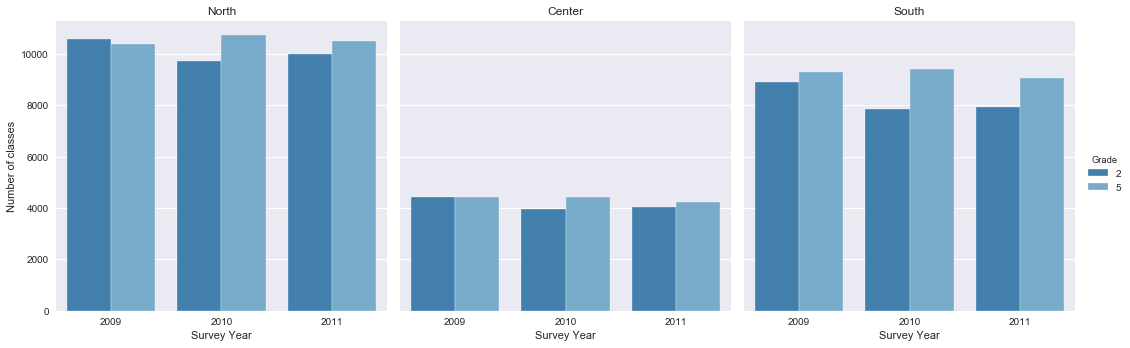

In [4]:
plot_count_classes(df)

For the remainder of the analysis, North and Center are grouped together. While culturally and historically Italy has divided into North, Center, and South, to the purpose of this analysis it is the divide in economic performance and institutional quality between the South (Sicily and Sardinia included) and the rest of the country that is of interest. As discussed above, differences in socio-economic conditions are relevant when addressing selection into treatment $D_1$, those in the outcome variable $Y$ turn out to be symptomatic of score manipulation being more common in the South.

As can be seen in Figure E3, classes in the North and Center are more likely to have higher shares of pupils with immigrant status or employed mothers than in the South. Figure E4 illustrates how the divide transpires from the distribution of average test scores as well, with dispersion being higher and exceptionally good grades being much more frequent in the South. These anomalies concern math more than language scores, and second-grade more than fifth-grade classes. This also becomes apparent when looking at the trend from the second to the fifth grade. Language test scores display the same tendency in the whole country: the distribution shifts to the right, with a higher mean and lower variance. In contrast, student performance in math improves on average in the North and in the Center, while worsening in the South due to markedly fewer observations in the high-end and more observations in the low-end spectrum. The random monitoring experiment later reveals how these differences in the test score distribution are in fact the result of test score manipulation (see Figure E6 for a visualization of the monitoring effect).

#### Figure E3: Distribution of Demographic Variables by Grade and Area

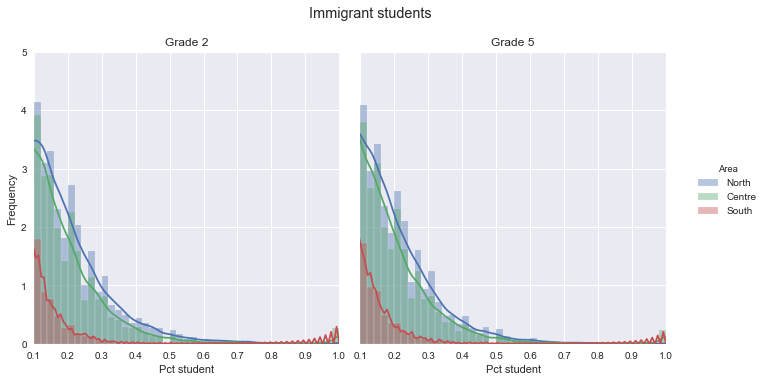

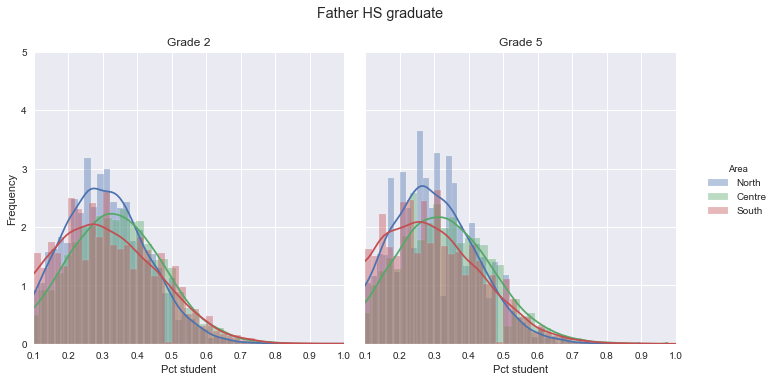

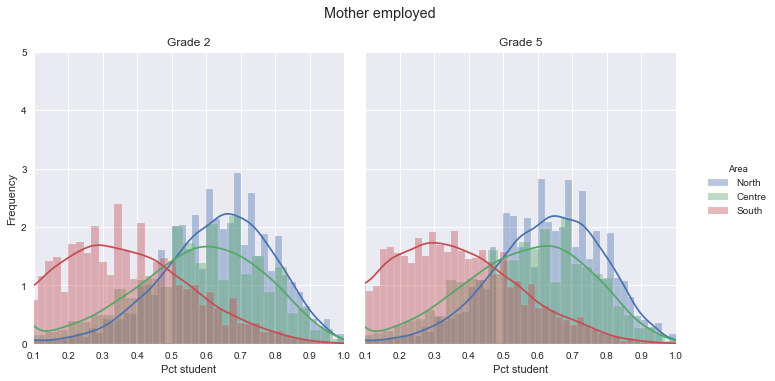

In [5]:
# the x axis is set to start at 0.1 to exclude the spike of observations around zero
# for transparency, the function allows to change the limits of the axes
# to zoom out set the second argument to [0,1], the third to [0,60]
plot_demo_dist(df,xlim=[0.1,1], ylim=[0,5])

#### Figure E4: Distribution of Math and Italian Language Test Scores by Grade and Area

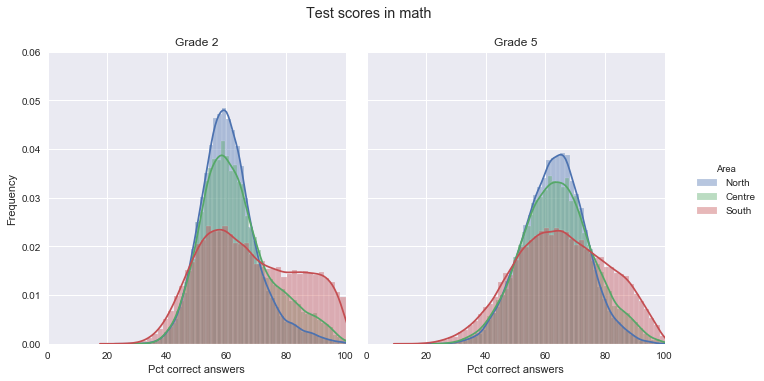

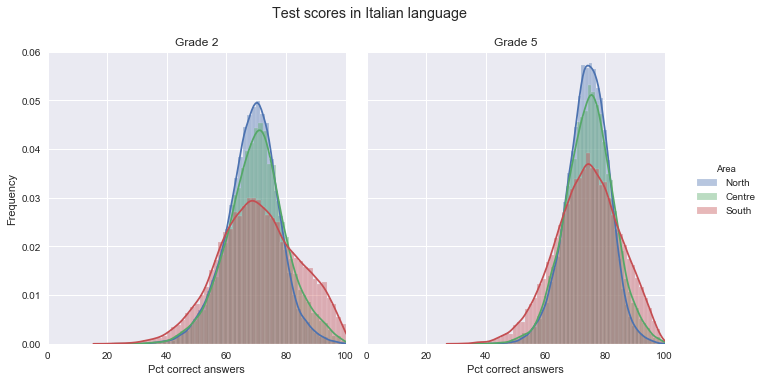

In [6]:
plot_score_dist(df)

Panels A, B, and C of Table 1 report descriptive statistics respectively for the class, school, and institution level (schools are oftentimes grouped together and managed as one unit). Demographic and most educational variables, some of which have just been discussed, are at class level and summarized in Panel A:
* The share of immigrant students is 9 p.p. higher in the North/Center than in the South;
* There is a wide regional gap of about 30 p.p. in employment rates of pupils' mothers, although this value appears to be somewhat inflated (see Table 4 and Figure E5). In contrast, the percentages of fathers who graduated from high school do not show such stark discrepancies; 
* Classes consists of 20 students;
* Mean test scores tend to differ by less than 2 p.p. between the North/Center and the South, except for math in the second grade (6.5 p.p.);
* Test scores in the South consistently display a higher standard deviation;
* The
and average test scores are about 6 to 10 p.p. higher in Italian language than in math (except for second-graders in the South). While scores  However, it is interesting to contrast student achievement in the South and in the North/Center. In the South, test scores in math are higher and student performance in general displays a higher variability. As can be seen in Figure E3, 

---
<span style="color:orange">**NOTE**</span> Some statistics displayed in Table 1 diverge from those reported in the original paper but align with the output of the original Stata code. I have contacted the authors, who have looked into it and confirmed that some numbers had been swapped.
In particular, the standard deviations and/or the means of the following variables appear to be incorrect: *Female, Immigrant, Father HS, Mother employed, Pct correct: Math, External monitor*. The rest of the analysis is unaffected by this problem.

---

#### Table 1 - Descriptive Statistics

_Panel A. Class characteristics: Means and standard deviations (in parentheses) are computed using one observation per class._

_*Conditional on non-missing survey responses_

In [7]:
create_table1a(df)

grade                                Grade 2                          Grade 5  \
north_center                           Italy North/Center     South     Italy   
Female*                      mean       0.49         0.49      0.49      0.49   
                             std        0.11         0.11      0.11      0.11   
Immigrant*                   mean       0.10         0.14      0.03      0.10   
                             std        0.12         0.13      0.06      0.12   
Father HS*                   mean       0.34         0.34      0.33      0.31   
                             std        0.14         0.13      0.16      0.15   
Mother employed*             mean       0.54         0.67      0.37      0.53   
                             std        0.23         0.16      0.20      0.23   
Pct correct: Math            mean      63.91        61.54     68.02     64.16   
                             std       13.15        10.29     16.20     12.91   
Pct correct: Language        mean      69.78        69.18     70.81     74.22   
                             std       10.92         9.18     13.34      8.90   
Class size                   mean      20.12        20.25     19.90     19.66   
                             std        3.40         3.35      3.48      3.72   
Score manipulation: Math     mean       0.06         0.02      0.14      0.07   
                             std        0.24         0.13      0.35      0.25   
Score manipulation: Language mean       0.05         0.02      0.11      0.06   
                             std        0.23         0.15      0.31      0.23   
Number of classes            count  67453.00     42747.00  24706.00  72536.00   

grade                                                      
north_center                       North/Center     South  
Female*                      mean          0.49      0.49  
                             std           0.11      0.11  
Immigrant*                   mean          0.14      0.03  
                             std           0.13      0.06  
Father HS*                   mean          0.32      0.30  
                             std           0.14      0.16  
Mother employed*             mean          0.65      0.36  
                             std           0.16      0.19  
Pct correct: Math            mean         63.26     65.61  
                             std          10.87     15.53  
Pct correct: Language        mean         74.27     74.12  
                             std           7.47     10.82  
Class size                   mean         19.90     19.28  
                             std           3.67      3.76  
Score manipulation: Math     mean          0.02      0.14  
                             std           0.15      0.34  
Score manipulation: Language mean          0.02      0.11  
                             std           0.15      0.31  
Number of classes            count     44739.00  27797.00

_Panel B. School characteristics: Means and standard deviations (in parentheses) are computed using one observation per school._

In [8]:
create_table1b(df)

grade                     Grade 2                          Grade 5  \
north_center                Italy North/Center     South     Italy   
Number of classes mean       1.95         1.87      2.11      1.94   
                  std        1.11         1.01      1.27      1.10   
Enrollment        mean      40.52        38.83     43.83     38.87   
                  std       25.16        22.99     28.64     25.19   
Number of schools count  34591.00     22863.00  11728.00  37476.00   

grade                                           
north_center            North/Center     South  
Number of classes mean          1.85      2.10  
                  std           0.98      1.28  
Enrollment        mean         37.32     41.69  
                  std          22.76     28.91  
Number of schools count     24225.00  13251.00

_Panel C. Institution characteristics: Means and standard deviations (in parentheses) are computed using one observation per institution._

In [9]:
create_table1c(df)

grade                     Grade 2                         Grade 5  \
north_center                Italy North/Center    South     Italy   
Number of classes mean       3.89         4.33     3.31      4.07   
                  std        1.97         1.95     1.85      1.95   
Enrollment        mean      86.00        95.33    73.68     85.17   
                  std       40.61        39.52    38.71     40.45   
External monitor  mean       0.22         0.23     0.20      0.21   
                  std        0.41         0.42     0.40      0.41   
Number of schools count  17333.00      9866.00  7467.00  17830.00   

grade                                          
north_center            North/Center    South  
Number of classes mean          4.48     3.55  
                  std           1.91     1.88  
Enrollment        mean         94.02    73.88  
                  std          39.11    39.31  
External monitor  mean          0.23     0.20  
                  std           0.42     0.40  
Number of schools count      9997.00  7833.00

Class sizes in Italy were mandated to range from 10 to 25 students until a 2009 reform (*Decreto del President della Repubblica 81/2009*), and from 15 to 27 thereafter. Given their stagged rollout, these changes interested only second-graders in the years 2010-11 and 2011-12, i.e. 43545 classes in the sample. Schools were allowed to diverge from these rules by 10 percent at the class-size cap and under special circumstances, e.g. remote location of the school or the presence of a student with disabilities. Figures 2 and 3 plot school enrollment against actual and predicted class size averages, respectively for classes unaffected and affected by the reform. It appears that Maimonides' Rule manages to follow actual class size relatively well up to an enrollment of 75 students, with deviations at the class-size cap typically consisting in adding a class earlier than mandated. The fit is worse for classes affected by the 2009 reform.

#### Figure 2 - Maimonides in Italy (Pre-Reform)

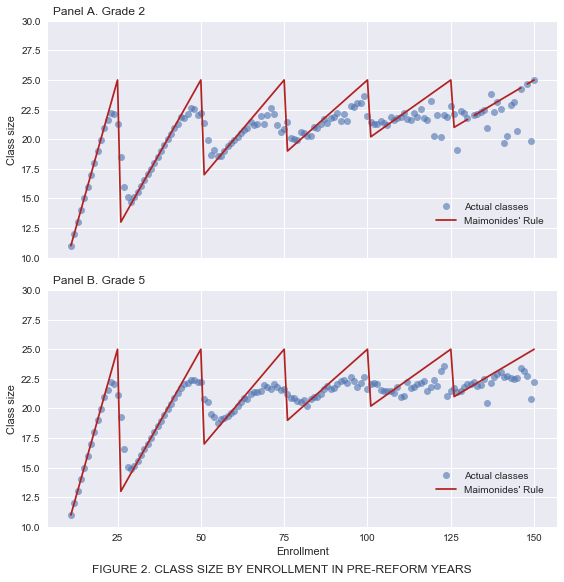

In [10]:
create_fig2(df)

#### Figure 3 - Maimonides in Italy (Post-Reform)

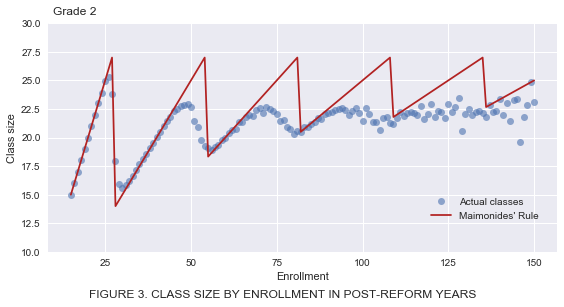

In [11]:
create_fig3(df)

In [12]:
print('There are', len(df[df['d']=='Grade 2 from 2010']), 'observations affected by the 2009 reform.')

There are 43545 observations affected by the 2009 reform.


---
<span style="color:orange">**NOTE**</span> Figures 4 to 6 have been modified. In contrast to Angrist et al. (2017), where only smoothed residuals are shown, here residuals are plotted against grade enrollment first as raw averages and then smoothed by a one-sided three-point moving averages that leave out observations in the [-2;+2] window. The objective was to adhere more closely to the standard implementation of RD graphical analysis. Further, Figures 5 and 6 group have been amended to display residuals by region *and* grade, both for consistency with Figure 4 and because the residuals have been minimized for a model that includes the grade dummy.

---

#### Figure 4 - RD Graphical Analysis: Class Size Residuals as a Function of Enrollment

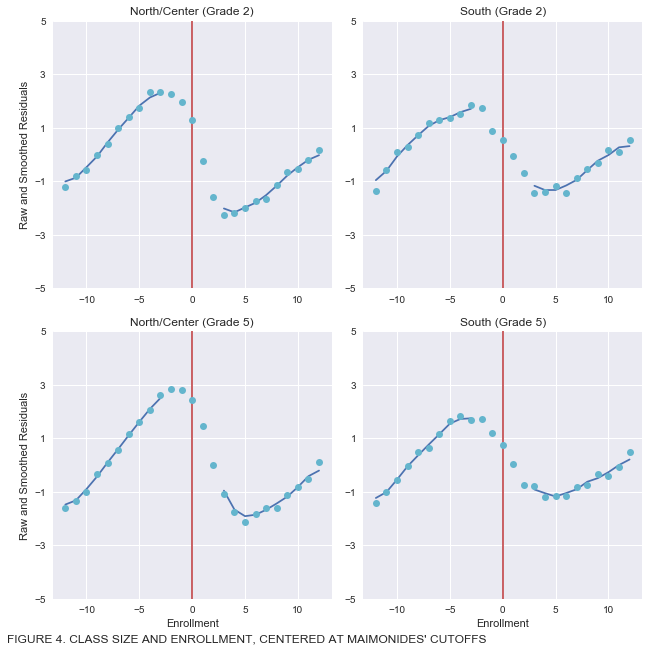

In [13]:
create_fig4(df)

#### Figure 5 - RD Graphical Analysis: Test Score Residuals as a Function of Enrollment

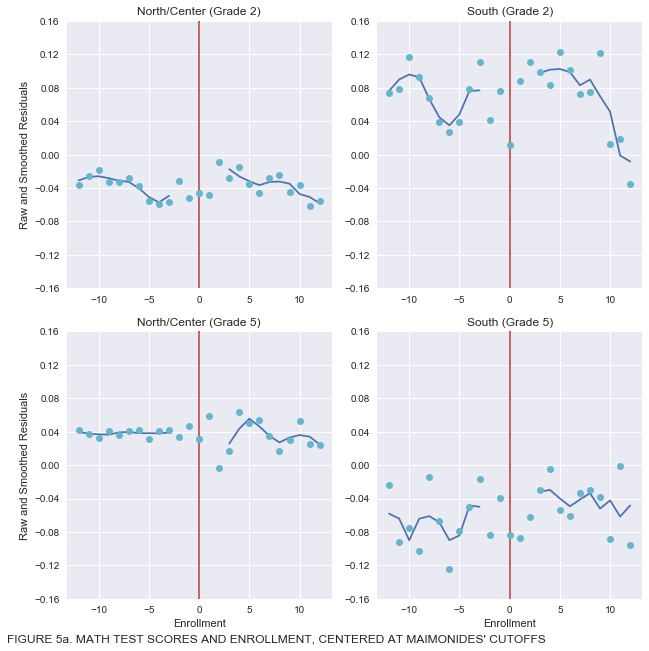

In [14]:
create_fig5a(df)

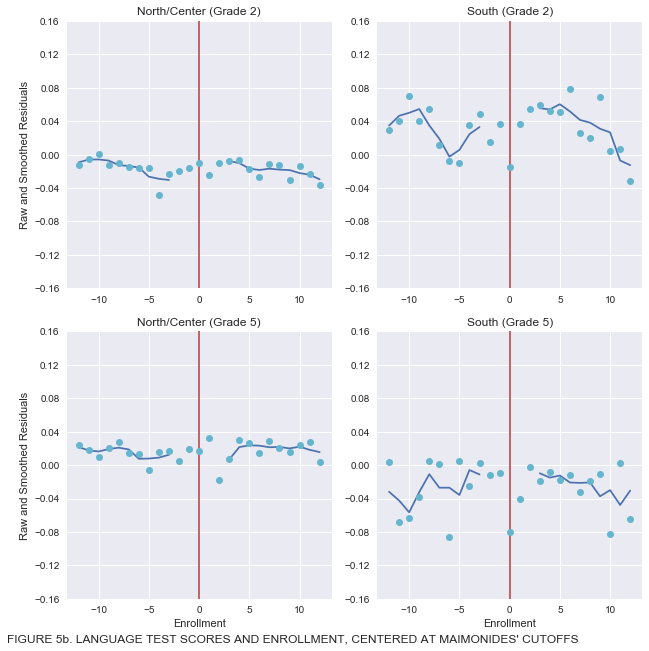

In [15]:
create_fig5b(df)

#### Figure 6 - RD Graphical Analysis: Manipulation Residuals as a Function of Enrollment

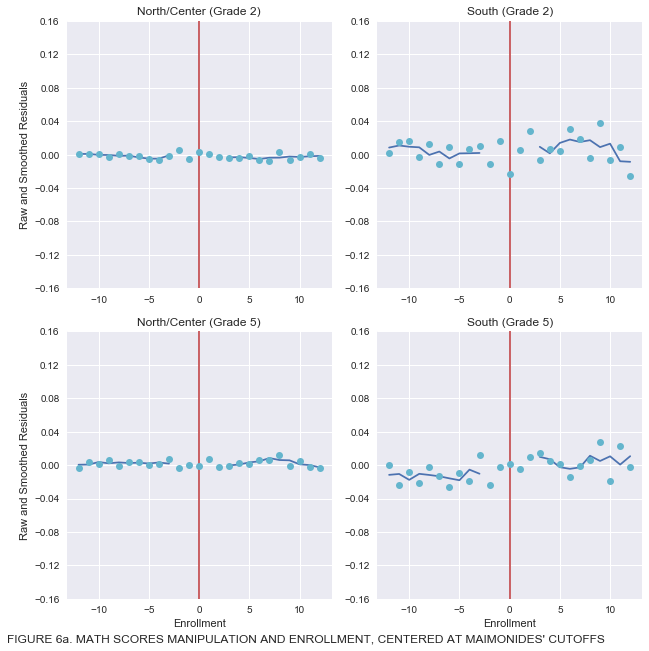

In [16]:
create_fig6a(df)

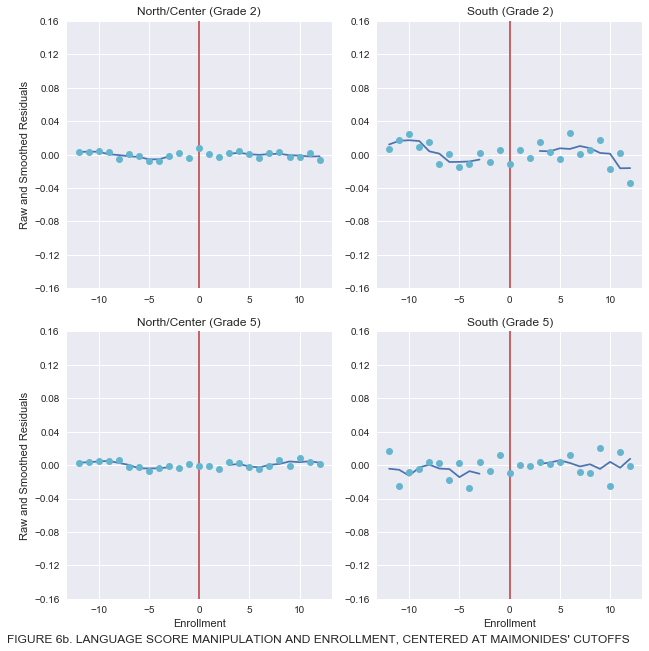

In [17]:
create_fig6b(df)

#### Table 2 - The Effect of Class Size on Test Scores (OLS vs 2SLS)

In [18]:
create_table2and3(df,['answers_math_std','answers_ital_std'],['Panel A. Math', 'Panel B. Language'])

OLS                      \
                                                Italy North/Center  South   
Panel A. Math     Class size - coefficient     -0.008       -0.022  0.009   
                  Class size - standard error   0.007        0.007  0.015   
                  Enrollment                        X            X      X   
                  Enrollment squared                X            X      X   
                  Interactions                                              
                  Observations                 140010        87498  52512   
Panel B. Language Class size - coefficient      0.003       -0.019  0.033   
                  Class size - standard error   0.006        0.005  0.011   
                  Enrollment                        X            X      X   
                  Enrollment squared                X            X      X   
                  Interactions                                              
                  Observations                 140010        87498  52512   

                                              IV/2SLS                       \
                                                Italy North/Center   South   
Panel A. Math     Class size - coefficient     -0.052       -0.044  -0.096   
                  Class size - standard error   0.013        0.012   0.036   
                  Enrollment                        X            X       X   
                  Enrollment squared                X            X       X   
                  Interactions                                               
                  Observations                 140010        87498   52512   
Panel B. Language Class size - coefficient     -0.040       -0.031  -0.064   
                  Class size - standard error   0.011        0.009   0.029   
                  Enrollment                        X            X       X   
                  Enrollment squared                X            X       X   
                  Interactions                                               
                  Observations                 140010        87498   52512   

                                               IV/2SLS                       
                                                 Italy North/Center   South  
Panel A. Math     Class size - coefficient      -0.061       -0.042  -0.129  
                  Class size - standard error    0.020        0.017   0.051  
                  Enrollment                         X            X       X  
                  Enrollment squared                 X            X       X  
                  Interactions                       X            X       X  
                  Observations                  140010        87498   52512  
Panel B. Language Class size - coefficient      -0.041       -0.021  -0.094  
                  Class size - standard error    0.016        0.014   0.040  
                  Enrollment                         X            X       X  
                  Enrollment squared                 X            X       X  
                  Interactions                       X            X       X  
                  Observations                  140010        87498   52512

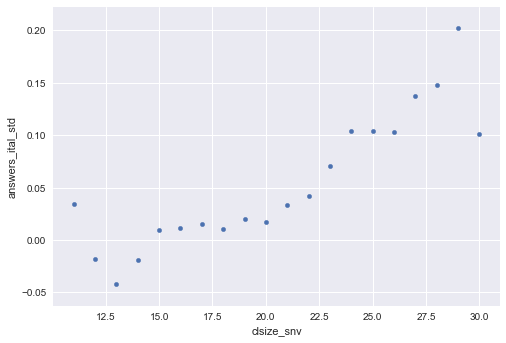

In [19]:
#sns.regplot(x='clsize_snv', y='answers_math_std', data=df.loc[df.north_center == 1],order=2)
df[df['north_center']==2].groupby(['clsize_snv'],as_index=False)['answers_ital_std'].mean().plot(kind='scatter',x='clsize_snv',y='answers_ital_std')

In [20]:
cheat = df.groupby(['grade','north_center','our_CHEAT_math'])[['classid']].count().transpose()
cheat.rename(index={'classid':'Math'},inplace=True)
cheat1 = df.groupby(['grade','north_center','our_CHEAT_ital'])[['classid']].count().transpose()
cheat1.rename(index={'classid':'Italian language'},inplace=True)
cheat = cheat.append(cheat1,ignore_index=False)
cheat.columns.set_levels([['Grade 5','Grade 2'],['North/Center','South'],['Not compromised', 'Compromised']],inplace=True)
cheat = cheat.reindex(sorted(cheat.columns),axis=1)
cheat

grade                 Grade 2                                              \
north_center     North/Center                       South                   
our_CHEAT_math    Compromised Not compromised Compromised Not compromised   
Math                      747           42003        3528           21180   
Italian language          919           41833        2740           21971   

grade                 Grade 5                                              
north_center     North/Center                       South                  
our_CHEAT_math    Compromised Not compromised Compromised Not compromised  
Math                      985           43756        3763           24034  
Italian language         1057           43684        3031           24768

#### Table 3 - The Effect of Class Size on Manipulation (OLS vs 2SLS)

In [ ]:
create_table2and3(df,['our_CHEAT_math','our_CHEAT_ital'],['Panel A. Math', 'Panel B. Language'])

#### Table 4 - Covariate Balance in The Monitoring Experiment

In [ ]:
create_table4a(df)

#### Figure E5: Monitoring and Data on Student Background

In [ ]:
plot_monitor_demodata(df)

#### Table 5 - Monitoring Effects on Score Manipulation and Test Scores

In [ ]:
create_table5(df)

#### Figure E6: Monitoring and Test Scores

In [ ]:
plot_monitor_testscores(df)

#### Table 6

In [ ]:
create_table6(df)

#### Table 8

In [ ]:
create_table8(df)

In [ ]:
df['dev'] = cutoffs_center(df)
df_south = df[df.north_center ==1]
cols = df_south[['female','m_female','immigrants_broad','m_origin','dad_midedu','m_dad_edu','mom_employed','m_mom_occ']]
titles = ['Female','Female - Missing','Immigrant','Immigrant - Missing','Fathe HS','Father HS - Missing','Mother Employed','Mother Employed - Missing']
Tot = int(len(cols.columns))
Rows = 2
Cols = int(Tot/Rows)
Position = range(1,Tot + 1)
# df.loc[df.sampled_math ==1] 

fig = plt.figure(1)
for k in range(Tot):
    df_south['mycolumn'] = cols.iloc[:,k]
    groupp = df_south.groupby(['dev'],as_index=False)['mycolumn'].mean()
    ax = fig.add_subplot(Rows,Cols,Position[k])
    sns.scatterplot(x='dev', y='mycolumn', data=groupp, palette='pastel',color='c')
    ax.set_ylabel('')
    ax.set_xlabel('Enrollment')
    ax.set_title(titles[k])
    ax.axvline(color='r')
    ax.xaxis.set_ticks(np.arange(-12,15,3))
    ax.yaxis.set_ticks(np.arange(round(groupp['mycolumn'].mean(),2)-0.05, round(groupp['mycolumn'].mean(),2)+0.05, 0.01))
    #plt.yticks(np.arange(min(groupp['mycolumn']), max(groupp['mycolumn']), .1))
    #sns.set(style="ticks")

plt.tight_layout()
fig.set_size_inches(14,8)
plt.show()

---
# 8. References
---

* **Angrist, J. D., and Lavy, V. (1999)**. Using Maimonides' rule to estimate the effect of class size on scholastic achievement. *The Quarterly Journal of Economics, 114(2)*, 533-575.
* **Angrist, J. D.,  Lavy, V., Leder-Luis, J., and Shany, A. (2019)**. Maimonides' Rule Redux. *American Economic Review: Insights, 1(3)*, 309-24.
* **Averett, S. L., and McLennan, M. C. (2004)**. Exploring the effect of class size on student achievement: What have we learned over the past two decades. *International handbook on the Economics of Education, 329*, 329.
* **Chetty, R., Friedman, J. N., Hilger, N., Saez, E., Schanzenbach, D. W., and Yagan, D. (2011)**. How does your kindergarten classroom affect your earnings? Evidence from Project STAR. *The Quarterly Journal of Economics, 126(4)*, 1593-1660.
* **Chingos, M. M. (2012)**. The impact of a universal class-size reduction policy: Evidence from Florida's statewide mandate. *Economics of Education Review, 31(5)*, 543-562.
* **Hoxby, C. M. (2000)**. The effects of class size on student achievement: New evidence from population variation. *The Quarterly Journal of Economics, 115(4)*, 1239-1285.
* **Jepsen, C., and Rivkin, S. (2009)**. Class size reduction and student achievement the potential tradeoff between teacher quality and class size. *Journal of human resources, 44(1)*, 223-250.
* **Krueger, A. B. (1999)**. Experimental estimates of education production functions. *The Quarterly Journal of Economics, 114(2)*, 497-532.